# Customer Segmentation

Ref: [Sidhardhan's ML projects](https://www.youtube.com/watch?v=SrY0sTJchHE&list=PLfFghEzKVmjvuSA67LszN1dZ-Dd_pkus6&index=14)

Author: Dathabase

> ### **Aim:**
To group customers based upon their spending patterns and purchase behaviour by using a K-Means clustering algorithm. This helps the business identify target customers to plan their forthcoming marketing strategies on.

> ### **Workflow:**

1. Get customer data* and respective labels
1. Data Pre-processing and analysis (indicate optimum number)
1. Use K-Means clustering algorithm to train the data (supervised learning)
1. Visualise the clusters

*The original dataset [(Link)](https://github.com/SteffiPeTaffy/machineLearningAZ/blob/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv) has been taken from the Udemy's Machine Learning A-Z course.

In [22]:
# importing required modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

## **Data Collection and Pre-processing**

In [2]:
customers_df = pd.read_csv("Mall_Customers.csv")
customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Columns
- `Spending Score (1-100)`: Assigned to a customer based on upon defined parameters eg: customer behavior and purchasing data

In [3]:
print(f"The dataframe has {customers_df.shape[0]} rows and {customers_df.shape[1]} columns")
print("Here are some basic stats regarding the numerical data:")
customers_df.describe()

The dataframe has 200 rows and 5 columns
Here are some basic stats regarding the numerical data:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## **Data Analysis**

In [4]:
# check for missing values
customers_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Luckily, we have no missing values for our dataset (hooray!), which means that we continue with our pre-porcessing and analysis without performing null-handling procedures

Based upon respective criteria, select relevant columns from the dataset:
- Spending habits based on annual income => Columns: `Annual Income (k$)` and `Spending Score (1-100)`
- Spending habits based on age => Columns: `Age` and `Spending Score (1-100)`

In [15]:
customers_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [51]:
X = customers_df.iloc[:,[3,4]].values

Choose optimal number of clusters by using a parameter called **WCSS** (Within Cluster Sum of Squares):
- finds the distance between each data point and the centroid of those clusters
- for the correct number of clusters, the WCSS value is at a minimum

In [52]:
# finding wcss value for different number of clusters
def wcss(data):
  '''
  Function that accepts feature data, fits a k-means clustering model to that data
  and returns the particular wcss values corresponding to each number of cluster
  '''
  values = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2) # best initiation method is 'k-means'
    kmeans.fit(data)
    values.append(kmeans.inertia_) # adds the particular wcss value to the list
  return values

Plot a graph to see the number of clusters that gives the lowest wcss value, such that beyond that number there is no significant drop in WCSS values

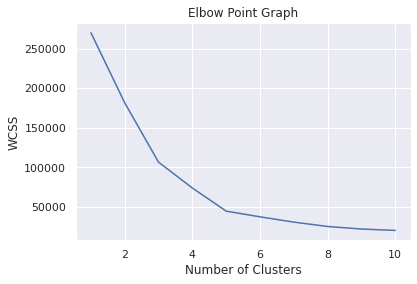

In [53]:
# plot elbow point graph
sns.set()
plt.plot(range(1,11), wcss(X))
plt.title("Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

From clear examination, 5 seems to be the most optimal number of clusters, after which there is no major drop in WCSS value.

## **Model Training and Visualisation**

In [54]:
# model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0) # best initiation method is 'k-means'

# get the cluster number of each data point as a label
Y = kmeans.fit_predict(X)

K-Means Clustering mechanism:
- Algorithm randomly assigns centroid values for each cluster
- Each data point is plotted on the graph, and assigned to the nearest cluster
- The centroids of each cluster are re-calculated and clusters are adjusted accordingly if there seems to be a deviation from the previous randomly assigned clusters

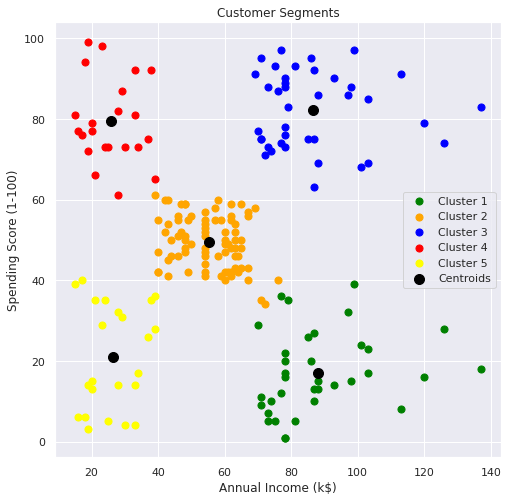

In [58]:
# plotting all clusters
# plt.scatter(data[label == cluster_number, 0], data[label == cluster_number, 1])

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='orange', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='yellow', label='Cluster 5')

# plotting all centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=100, c='black', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

Inferences
- Cluster 1 (Green) and Cluster 5 (Yellow) customers spend less overall so the supermarket needs to carry out different strategies to boost their sales:
  - Yellow group have low annual income, so higher discounts on necessary goods need to be offered
  - Green group have a high annual income, so the mall just needs to market its products right so these particular group of customers buy their product

- Generally, old people spend less than the younger generation; the mall should come up with more items of use for these group of people.